<a href="https://colab.research.google.com/github/RebeccaKessler/Machine_Learning/blob/main/Codes/Basic_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [6]:
df_training_data = pd.read_csv('https://raw.githubusercontent.com/RebeccaKessler/Machine_Learning/main/training_data.csv')
df_unlabelled_test_data = pd.read_csv('https://raw.githubusercontent.com/RebeccaKessler/Machine_Learning/main/unlabelled_test_data.csv')

In [4]:
df_training_data.head(5)

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [5]:
df_unlabelled_test_data.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [7]:
# Count how many sentences have the same difficulty for each class in the training dataset
difficulty_counts = df_training_data['difficulty'].value_counts()
print(difficulty_counts)

difficulty
A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: count, dtype: int64


# Logistic Regresssion

## Train on the 80% of training data, test on 20% of training data

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Select the feature x and the target variable y
x = df_training_data['sentence']
y = df_training_data['difficulty']

# Split the training dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Text preprocessing using TfidfVectorizer to convert the data into TF-IDF features
vectorizer = TfidfVectorizer(ngram_range=(1, 1)) # consider only single words (unigrams)
x_train_tfidf = vectorizer.fit_transform(x_train) # fit vectorizer on + transfrom train data
x_test_tfidf = vectorizer.transform(x_test) # transform test data

In [4]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model_LR = LogisticRegression()
model_LR.fit(x_train_tfidf, y_train)

# Make predictions on the test data with the trained model
LR_pred = model_LR.predict(x_test_tfidf)

df_pred_LR = pd.DataFrame({'id': x_test.index, 'difficulty': LR_pred})
df_pred_LR

,id,difficulty
0,596,A1
1,3370,B2
2,3048,C2
3,2908,B2
4,8,B1
...,...,...
955,2968,A1
956,198,C2
957,2422,C2
958,1485,C2


Scores of the Logistic Regression model for split train-test dataset:
           Average scores
Accuracy         0.451042
Precision        0.443057
Recall           0.448917
F1 score         0.441798


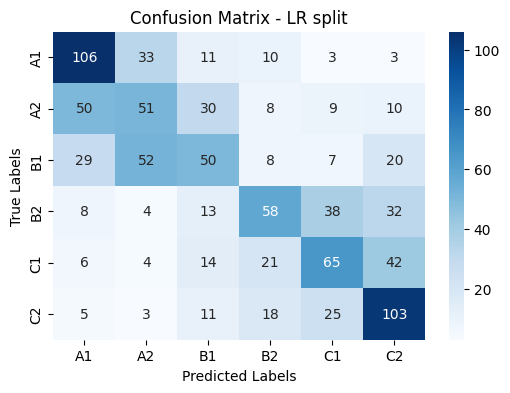

Scores for each class of the Logistic Regression model for split train-test dataset:
                 A1        A2        B1        B2        C1        C2
Accuracy   0.638554  0.322785  0.301205  0.379085  0.427632  0.624242
Precision  0.519608  0.346939  0.387597  0.471545  0.442177  0.490476
Recall     0.638554  0.322785  0.301205  0.379085  0.427632  0.624242
F1 score   0.572973  0.334426  0.338983  0.420290  0.434783  0.549333


In [9]:
# Accuracy, Precision, Recall, F1-score with 'macro' average for simplicity

accuracy_LR_split = accuracy_score(y_test, LR_pred)
precision_LR_split = precision_score(y_test, LR_pred, average='macro')
recall_LR_split = recall_score(y_test, LR_pred, average='macro')
f1_LR_split = f1_score(y_test, LR_pred, average='macro')

LR_scores = pd.DataFrame([accuracy_LR_split, precision_LR_split, recall_LR_split, f1_LR_split], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['Average scores'])
print("Scores of the Logistic Regression model for split train-test dataset:")
print(LR_scores) # Visualize all results in a dataframe

# Confusion Matrix

cm_LR_split = confusion_matrix(y_test, LR_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_LR_split, annot=True, fmt='d', cmap='Blues', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LR split')
plt.show()

# Accuracy, Precision, Recall, F1-score for each class

TP_LR_split = np.diag(cm_LR_split) # True positives for each class
tot_LR_split = cm_LR_split.sum(axis=1) # Total samples for each class

indiv_LR_accuracy = TP_LR_split / tot_LR_split # Accuracy for each class
indiv_LR_precision = precision_score(y_test, LR_pred, average = None)
indiv_LR_recall = recall_score(y_test, LR_pred, average = None)
indiv_LR_f1 = f1_score(y_test, LR_pred, average = None)

indiv_LR_scores = pd.DataFrame([indiv_LR_accuracy, indiv_LR_precision, indiv_LR_recall, indiv_LR_f1], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
print("Scores for each class of the Logistic Regression model for split train-test dataset:")
print(indiv_LR_scores) # Visualize all results in a dataframe

In [ ]:
from sklearn.model_selection import GridSearchCV

# Find the optimal parameters with hyperparameter tuning

# Define the parameters to test
param_grid_LR = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500],
    'tol': [1e-4, 1e-5]
}

# Initialize the Logistic Regression model, perform grid search, fit the model
model_LR_cv = LogisticRegression()
LR_cv = GridSearchCV(model_LR_cv, param_grid_LR, cv=5)
LR_cv.fit(x_train_tfidf, y_train)

# Get the best parameters
best_param_LR = LR_cv.best_params_
print('The best parameters are:', best_param_LR)

# Initialize and train the Logistic Regression model
model_LR_best = LogisticRegression()
model_LR_best.fit(x_train_tfidf, y_train)

# Make predictions on the test data with the trained model
LR_pred_best = model_LR_best.predict(x_test_tfidf)

df_pred_LR_best = pd.DataFrame({'id': x_test.index, 'difficulty': LR_pred_best})
df_pred_LR_best

accuracy_LR_split_best = accuracy_score(y_test, LR_pred_best)
print("Accuracy of the Logistic Regression model with the best parameters, for split train-test dataset:", accuracy_LR_split_best)

Output streaming troncato alle ultime 5000 righe.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will igno

The best parameters are: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
Accuracy of the Logistic Regression model with the best parameters, for split train-test dataset: 0.4510416666666667


## Train on the full training data, test on the unlabelled test data

In [10]:
# Select the feature x and the target variable y
x = df_training_data['sentence']
y = df_training_data['difficulty']

# Define the test data
x_test_unlabelled = df_unlabelled_test_data['sentence']

# Text preprocessing using TfidfVectorizer to convert the data into TF-IDF features
x_full_tfidf = vectorizer.fit_transform(x) # fit vectorizer on + transfrom train data
x_test_unlabelled_tfidf = vectorizer.transform(x_test_unlabelled) # transform test data

In [11]:
# Initialize and train the Logistic Regression model on the whole dataset
model_LR = LogisticRegression()
model_LR.fit(x_full_tfidf, y)

# Make predictions on the test data with the trained model
LR_pred_full = model_LR.predict(x_test_unlabelled_tfidf)

df_pred_LR_full = pd.DataFrame({'id': x_test_unlabelled.index, 'difficulty': LR_pred_full})
df_pred_LR_full

,id,difficulty
0,0,C2
1,1,A2
2,2,A1
3,3,A1
4,4,C2
...,...,...
1195,1195,B1
1196,1196,A2
1197,1197,C2
1198,1198,C1


In [12]:
# Export the dataframe as csv
df_pred_LR_full.to_csv("submission_LR.csv", index=False)

# KNN

## Split train-test dataset

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the kNN classifier
model_kNN = KNeighborsClassifier()

model_kNN.fit(x_train_tfidf, y_train)

# Make predictions on the test data
kNN_pred = model_kNN.predict(x_test_tfidf)

df_pred_kNN = pd.DataFrame({'id': x_test.index, 'difficulty': kNN_pred})
df_pred_kNN

,id,difficulty
0,596,A1
1,3370,A1
2,3048,C2
3,2908,A2
4,8,A1
...,...,...
955,2968,A1
956,198,C2
957,2422,B2
958,1485,B1


Scores of the kNN Classifier for split train-test dataset:
           Average scores
Accuracy         0.318750
Precision        0.392613
Recall           0.315088
F1 score         0.294232


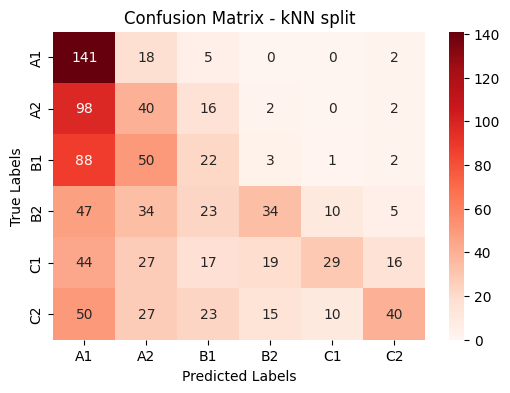

Scores for each class of the kNN Classifier for split train-test dataset:
                 A1        A2        B1        B2        C1        C2
Accuracy   0.849398  0.253165  0.132530  0.222222  0.190789  0.242424
Precision  0.301282  0.204082  0.207547  0.465753  0.580000  0.597015
Recall     0.849398  0.253165  0.132530  0.222222  0.190789  0.242424
F1 score   0.444795  0.225989  0.161765  0.300885  0.287129  0.344828


In [14]:
# Accuracy, Precision, Recall, F1-score with 'macro' average for simplicity

accuracy_kNN_split = accuracy_score(y_test, kNN_pred)
precision_kNN_split = precision_score(y_test, kNN_pred, average='macro')
recall_kNN_split = recall_score(y_test, kNN_pred, average='macro')
f1_kNN_split = f1_score(y_test, kNN_pred, average='macro')

kNN_scores = pd.DataFrame([accuracy_kNN_split, precision_kNN_split, recall_kNN_split, f1_kNN_split], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['Average scores'])
print("Scores of the kNN Classifier for split train-test dataset:")
print(kNN_scores) # Visualize all results in a dataframe

# Confusion Matrix

cm_kNN_split = confusion_matrix(y_test, kNN_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_kNN_split, annot=True, fmt='d', cmap='Reds', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - kNN split')
plt.show()

# Accuracy, Precision, Recall, F1-score for each class

TP_kNN_split = np.diag(cm_kNN_split) # True positives for each class
tot_kNN_split = cm_kNN_split.sum(axis=1) # Total samples for each class

indiv_kNN_accuracy = TP_kNN_split / tot_kNN_split # Accuracy for each class
indiv_kNN_precision = precision_score(y_test, kNN_pred, average = None)
indiv_kNN_recall = recall_score(y_test, kNN_pred, average = None)
indiv_kNN_f1 = f1_score(y_test, kNN_pred, average = None)

indiv_kNN_scores = pd.DataFrame([indiv_kNN_accuracy, indiv_kNN_precision, indiv_kNN_recall, indiv_kNN_f1], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
print("Scores for each class of the kNN Classifier for split train-test dataset:")
print(indiv_kNN_scores) # Visualize all results in a dataframe

In [15]:
# Loop over the model parameters to find the optimal parameters (for the best accuracy)
n_neighbors = [1,3,5,7]
p_values = [1,2] # 1) Manhattan distance 2) Euclidian distance
weights = ['uniform', 'distance']

for w in weights:
    for p in p_values:
        for n in n_neighbors:
            model = KNeighborsClassifier(n_neighbors=n, p=p, weights=w)
            model.fit(x_train_tfidf, y_train)
            accuracy_kNN = model.score(x_test_tfidf, y_test)
            print(f"Accuracy of kNN classifier for k = {n}, p = {p}, weight = {w}: {accuracy_kNN}")

Accuracy of kNN classifier for k = 1, p = 1, weight = uniform: 0.22291666666666668
Accuracy of kNN classifier for k = 3, p = 1, weight = uniform: 0.175
Accuracy of kNN classifier for k = 5, p = 1, weight = uniform: 0.17395833333333333
Accuracy of kNN classifier for k = 7, p = 1, weight = uniform: 0.17291666666666666
Accuracy of kNN classifier for k = 1, p = 2, weight = uniform: 0.37916666666666665
Accuracy of kNN classifier for k = 3, p = 2, weight = uniform: 0.290625
Accuracy of kNN classifier for k = 5, p = 2, weight = uniform: 0.31875
Accuracy of kNN classifier for k = 7, p = 2, weight = uniform: 0.31145833333333334
Accuracy of kNN classifier for k = 1, p = 1, weight = distance: 0.22291666666666668
Accuracy of kNN classifier for k = 3, p = 1, weight = distance: 0.17083333333333334
Accuracy of kNN classifier for k = 5, p = 1, weight = distance: 0.171875
Accuracy of kNN classifier for k = 7, p = 1, weight = distance: 0.17395833333333333
Accuracy of kNN classifier for k = 1, p = 2, wei

In [16]:
from sklearn.model_selection import GridSearchCV

# Find the optimal parameters with hyperparameter tuning

# Define the parameters to test
param_grid_kNN = {'n_neighbors':np.arange(1,10), 'p':np.arange(1,2), 'weights':['uniform','distance']}

# Initialize the kNN classifier, perform grid search, fit the model
model_kNN_cv = KNeighborsClassifier()
kNN_cv = GridSearchCV(model_kNN_cv, param_grid_kNN, cv=5)
kNN_cv.fit(x_train_tfidf, y_train)

# Get the best parameters
best_param_kNN = kNN_cv.best_params_
print('The best parameters are:', best_param_kNN)

# Initialize and train the kNN classifier with the best parameters
model_kNN_best = KNeighborsClassifier(n_neighbors=1, p=2, weights='distance')

model_kNN_best.fit(x_train_tfidf, y_train)

# Make predictions on the test data
kNN_pred_best = model_kNN_best.predict(x_test_tfidf)

df_pred_kNN_best = pd.DataFrame({'id': x_test.index, 'difficulty': kNN_pred_best})
df_pred_kNN_best

The best parameters are: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


,id,difficulty
0,596,A1
1,3370,A1
2,3048,A2
3,2908,C1
4,8,A2
...,...,...
955,2968,A1
956,198,C2
957,2422,A2
958,1485,B1


Scores of the kNN Classifier with the best parameters for split train-test dataset:
           Average scores
Accuracy         0.318750
Precision        0.392613
Recall           0.315088
F1 score         0.294232


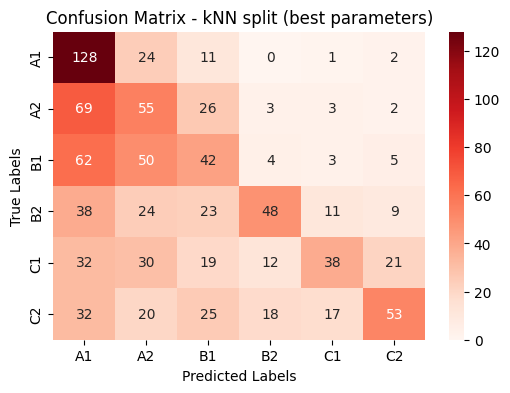

Scores for each class of the kNN Classifier with the best parameters for split train-test dataset:
                 A1        A2        B1        B2        C1        C2
Accuracy   0.771084  0.348101  0.253012  0.313725  0.250000  0.321212
Precision  0.354571  0.270936  0.287671  0.564706  0.520548  0.576087
Recall     0.771084  0.348101  0.253012  0.313725  0.250000  0.321212
F1 score   0.485769  0.304709  0.269231  0.403361  0.337778  0.412451


In [17]:
# Accuracy, Precision, Recall, F1-score with 'macro' average for simplicity (best parameters)

accuracy_kNN_split_best = accuracy_score(y_test, kNN_pred_best)
precision_kNN_split_best = precision_score(y_test, kNN_pred_best, average='macro')
recall_kNN_split_best = recall_score(y_test, kNN_pred_best, average='macro')
f1_kNN_split_best = f1_score(y_test, kNN_pred_best, average='macro')

kNN_scores_best = pd.DataFrame([accuracy_kNN_split, precision_kNN_split, recall_kNN_split, f1_kNN_split], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['Average scores'])
print("Scores of the kNN Classifier with the best parameters for split train-test dataset:")
print(kNN_scores_best) # Visualize all results in a dataframe

# Confusion Matrix (best parameters)
cm_kNN_split_best = confusion_matrix(y_test, kNN_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_kNN_split_best, annot=True, fmt='d', cmap='Reds', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - kNN split (best parameters)')
plt.show()

# Accuracy, Precision, Recall, F1-score for each class (best parameters)

TP_kNN_split_best = np.diag(cm_kNN_split_best) # True positives for each class
tot_kNN_split_best = cm_kNN_split_best.sum(axis=1) # Total samples for each class

indiv_kNN_accuracy_best = TP_kNN_split_best / tot_kNN_split_best # Accuracy for each class
indiv_kNN_precision_best = precision_score(y_test, kNN_pred_best, average = None)
indiv_kNN_recall_best = recall_score(y_test, kNN_pred_best, average = None)
indiv_kNN_f1_best = f1_score(y_test, kNN_pred_best, average = None)

indiv_kNN_scores_best = pd.DataFrame([indiv_kNN_accuracy_best, indiv_kNN_precision_best, indiv_kNN_recall_best, indiv_kNN_f1_best], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
print("Scores for each class of the kNN Classifier with the best parameters for split train-test dataset:")
print(indiv_kNN_scores_best) # Visualize all results in a dataframe

## Full dataset

In [18]:
# Initialize and fit the kNN classifier on the whole dataset
model_kNN = KNeighborsClassifier(n_neighbors=1, p=2, weights='distance')

model_kNN.fit(x_full_tfidf, y)

# Make predictions on the test data
kNN_pred_full = model_kNN.predict(x_test_unlabelled_tfidf)

df_pred_kNN_full = pd.DataFrame({'id': x_test_unlabelled.index, 'difficulty': kNN_pred_full})
df_pred_kNN_full

,id,difficulty
0,0,C2
1,1,B1
2,2,A1
3,3,A2
4,4,C2
...,...,...
1195,1195,A2
1196,1196,A1
1197,1197,C2
1198,1198,C1


In [19]:
# Export the dataframe as csv
df_pred_kNN_full.to_csv("submission_kNN.csv", index=False)

# Decision Tree

## Split train-test dataset

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the Decision Tree model
model_DT = DecisionTreeClassifier()

model_DT.fit(x_train_tfidf, y_train)

# Make predictions on the test data
DT_pred = model_DT.predict(x_test_tfidf)

df_pred_DT = pd.DataFrame({'id': x_test.index, 'difficulty': DT_pred})
df_pred_DT

,id,difficulty
0,596,A1
1,3370,B2
2,3048,B2
3,2908,B2
4,8,A1
...,...,...
955,2968,A2
956,198,A1
957,2422,A1
958,1485,A1


Scores of the Decision Tree Classifier for split train-test dataset:
           Average scores
Accuracy         0.309375
Precision        0.302268
Recall           0.308124
F1 score         0.301697


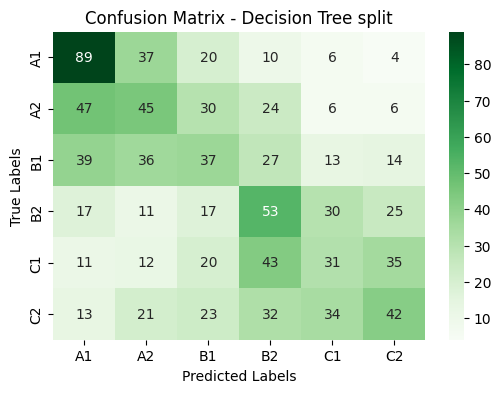

Scores for each class of the Decision Tree Classifier for split train-test dataset:
                 A1        A2        B1        B2        C1        C2
Accuracy   0.536145  0.284810  0.222892  0.346405  0.203947  0.254545
Precision  0.412037  0.277778  0.251701  0.280423  0.258333  0.333333
Recall     0.536145  0.284810  0.222892  0.346405  0.203947  0.254545
F1 score   0.465969  0.281250  0.236422  0.309942  0.227941  0.288660


In [21]:
# Accuracy, Precision, Recall, F1-score with 'macro' average for simplicity

accuracy_DT_split = accuracy_score(y_test, DT_pred)
precision_DT_split = precision_score(y_test, DT_pred, average='macro')
recall_DT_split = recall_score(y_test, DT_pred, average='macro')
f1_DT_split = f1_score(y_test, DT_pred, average='macro')

DT_scores = pd.DataFrame([accuracy_DT_split, precision_DT_split, recall_DT_split, f1_DT_split], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['Average scores'])
print("Scores of the Decision Tree Classifier for split train-test dataset:")
print(DT_scores) # Visualize all results in a dataframe

# Confusion Matrix
cm_DT_split = confusion_matrix(y_test, DT_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_DT_split, annot=True, fmt='d', cmap='Greens', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree split')
plt.show()

# Accuracy, Precision, Recall, F1-score for each class

TP_DT_split = np.diag(cm_DT_split) # True positives for each class
tot_DT_split = cm_DT_split.sum(axis=1) # Total samples for each class

indiv_DT_accuracy = TP_DT_split / tot_DT_split # Accuracy for each class
indiv_DT_precision = precision_score(y_test, DT_pred, average = None)
indiv_DT_recall = recall_score(y_test, DT_pred, average = None)
indiv_DT_f1 = f1_score(y_test, DT_pred, average = None)

indiv_DT_scores = pd.DataFrame([indiv_DT_accuracy, indiv_DT_precision, indiv_DT_recall, indiv_DT_f1], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
print("Scores for each class of the Decision Tree Classifier for split train-test dataset:")
print(indiv_DT_scores) # Visualize all results in a dataframe

In [22]:
# Loop over the model parameters to find the optimal parameters (for the best accuracy)
criterion = ['gini', 'entropy']
max_depth = [1,2,3,4,5]

for d in max_depth:
    for c in criterion:
            model = DecisionTreeClassifier(criterion=c, max_depth=d)
            model.fit(x_train_tfidf, y_train)
            accuracy_DT = model.score(x_test_tfidf, y_test)
            print(f"Accuracy of Decision Tree model for criterion = {c}, max_depth = {d}: {accuracy_DT}")

Accuracy of Decision Tree model for criterion = gini, max_depth = 1: 0.25729166666666664
Accuracy of Decision Tree model for criterion = entropy, max_depth = 1: 0.25729166666666664
Accuracy of Decision Tree model for criterion = gini, max_depth = 2: 0.26666666666666666
Accuracy of Decision Tree model for criterion = entropy, max_depth = 2: 0.24166666666666667
Accuracy of Decision Tree model for criterion = gini, max_depth = 3: 0.2875
Accuracy of Decision Tree model for criterion = entropy, max_depth = 3: 0.29270833333333335
Accuracy of Decision Tree model for criterion = gini, max_depth = 4: 0.28020833333333334
Accuracy of Decision Tree model for criterion = entropy, max_depth = 4: 0.284375
Accuracy of Decision Tree model for criterion = gini, max_depth = 5: 0.29270833333333335
Accuracy of Decision Tree model for criterion = entropy, max_depth = 5: 0.29583333333333334


In [23]:
from sklearn.model_selection import GridSearchCV

# Find the optimal parameters with hyperparameter tuning

# Define the parameters to test
param_grid_DT = {'criterion':['gini','entropy'], 'max_depth':np.arange(1,10)}

# Initialize the kNN classifier, perform grid search, fit the model
model_DT_cv = DecisionTreeClassifier()
DT_cv = GridSearchCV(model_DT_cv, param_grid_DT, cv=5)
DT_cv.fit(x_train_tfidf, y_train)

# Get the best parameters
best_param_DT = DT_cv.best_params_
print('The best parameters are:', best_param_DT)

# Initialize and train the Decision Tree model with the best parameters
model_DT_best = DecisionTreeClassifier(criterion='entropy', max_depth=5)

model_DT_best.fit(x_train_tfidf, y_train)

# Make predictions on the test data
DT_pred_best = model_DT_best.predict(x_test_tfidf)

df_pred_DT_best = pd.DataFrame({'id': x_test.index, 'difficulty': DT_pred_best})
df_pred_DT_best

The best parameters are: {'criterion': 'entropy', 'max_depth': 9}


,id,difficulty
0,596,A1
1,3370,C1
2,3048,C1
3,2908,B2
4,8,C1
...,...,...
955,2968,A1
956,198,B2
957,2422,B2
958,1485,B2


Scores of the Decision Tree Classifier with the best parameters for split train-test dataset:
           Average scores
Accuracy         0.295833
Precision        0.298943
Recall           0.297734
F1 score         0.245010


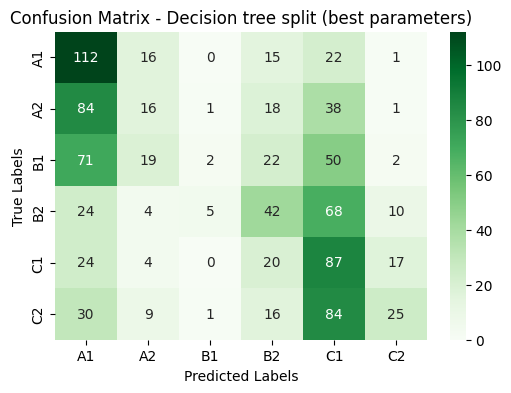

Scores for each class of the Decision Tree Classifier with the best parameters for split train-test dataset:
                 A1        A2        B1        B2        C1        C2
Accuracy   0.674699  0.101266  0.012048  0.274510  0.572368  0.151515
Precision  0.324638  0.235294  0.222222  0.315789  0.249284  0.446429
Recall     0.674699  0.101266  0.012048  0.274510  0.572368  0.151515
F1 score   0.438356  0.141593  0.022857  0.293706  0.347305  0.226244


In [24]:
# Accuracy, Precision, Recall, F1-score with 'macro' average for simplicity (best parameters)

accuracy_DT_split_best = accuracy_score(y_test, DT_pred_best)
precision_DT_split_best = precision_score(y_test, DT_pred_best, average='macro')
recall_DT_split_best = recall_score(y_test, DT_pred_best, average='macro')
f1_DT_split_best = f1_score(y_test, DT_pred_best, average='macro')

DT_scores_best = pd.DataFrame([accuracy_DT_split_best, precision_DT_split_best, recall_DT_split_best, f1_DT_split_best], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['Average scores'])
print("Scores of the Decision Tree Classifier with the best parameters for split train-test dataset:")
print(DT_scores_best) # Visualize all results in a dataframe

# Confusion Matrix (best parameters)
cm_DT_split_best = confusion_matrix(y_test, DT_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_DT_split_best, annot=True, fmt='d', cmap='Greens', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision tree split (best parameters)')
plt.show()

# Accuracy, Precision, Recall, F1-score for each class (best parameters)

TP_DT_split_best = np.diag(cm_DT_split_best) # True positives for each class
tot_DT_split_best = cm_DT_split_best.sum(axis=1) # Total samples for each class

indiv_DT_accuracy_best = TP_DT_split_best / tot_DT_split_best # Accuracy for each class
indiv_DT_precision_best = precision_score(y_test, DT_pred_best, average = None)
indiv_DT_recall_best = recall_score(y_test, DT_pred_best, average = None)
indiv_DT_f1_best = f1_score(y_test, DT_pred_best, average = None)

indiv_DT_scores_best = pd.DataFrame([indiv_DT_accuracy_best, indiv_DT_precision_best, indiv_DT_recall_best, indiv_DT_f1_best], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
print("Scores for each class of the Decision Tree Classifier with the best parameters for split train-test dataset:")
print(indiv_DT_scores_best) # Visualize all results in a dataframe

## Full dataset

In [25]:
# Initialize and fit the kNN classifier on the whole dataset
model_DT = DecisionTreeClassifier()

model_DT.fit(x_full_tfidf, y)

# Make predictions on the test data
DT_pred_full = model_DT.predict(x_test_unlabelled_tfidf)

df_pred_DT_full = pd.DataFrame({'id': x_test_unlabelled.index, 'difficulty': DT_pred_full})
df_pred_DT_full

,id,difficulty
0,0,C1
1,1,B1
2,2,A1
3,3,A1
4,4,C2
...,...,...
1195,1195,B2
1196,1196,A1
1197,1197,C2
1198,1198,A1


In [26]:
# Export the dataframe as csv
df_pred_DT_full.to_csv("submission_DT.csv", index=False)

# Random Forest

## Split train-test dataset

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the kNN classifier
model_RF = RandomForestClassifier()

model_RF.fit(x_train_tfidf, y_train)

# Make predictions on the test data
RF_pred = model_RF.predict(x_test_tfidf)

df_pred_RF = pd.DataFrame({'id': x_test.index, 'difficulty': RF_pred})
df_pred_RF

,id,difficulty
0,596,A1
1,3370,B1
2,3048,C2
3,2908,A2
4,8,A2
...,...,...
955,2968,A1
956,198,B2
957,2422,B1
958,1485,A1


Scores of the Random Forest Classifier for split train-test dataset:
           Average scores
Accuracy         0.390625
Precision        0.399088
Recall           0.388490
F1 score         0.373251


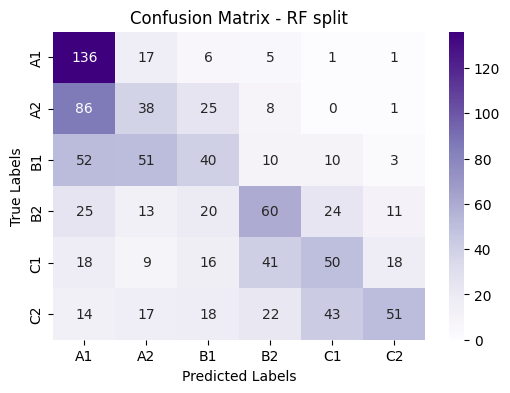

Scores for each class of the Random Forest Classifier for split train-test dataset:
                 A1        A2        B1        B2        C1        C2
Accuracy   0.819277  0.240506  0.240964  0.392157  0.328947  0.309091
Precision  0.410876  0.262069  0.320000  0.410959  0.390625  0.600000
Recall     0.819277  0.240506  0.240964  0.392157  0.328947  0.309091
F1 score   0.547284  0.250825  0.274914  0.401338  0.357143  0.408000


In [28]:
# Accuracy, Precision, Recall, F1-score with 'macro' average for simplicity

accuracy_RF_split = accuracy_score(y_test, RF_pred)
precision_RF_split = precision_score(y_test, RF_pred, average='macro')
recall_RF_split = recall_score(y_test, RF_pred, average='macro')
f1_RF_split = f1_score(y_test, RF_pred, average='macro')

RF_scores = pd.DataFrame([accuracy_RF_split, precision_RF_split, recall_RF_split, f1_RF_split], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['Average scores'])
print("Scores of the Random Forest Classifier for split train-test dataset:")
print(RF_scores) # Visualize all results in a dataframe

# Confusion Matrix

cm_RF_split = confusion_matrix(y_test, RF_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_RF_split, annot=True, fmt='d', cmap='Purples', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RF split')
plt.show()

# Accuracy, Precision, Recall, F1-score for each class

TP_RF_split = np.diag(cm_RF_split) # True positives for each class
tot_RF_split = cm_RF_split.sum(axis=1) # Total samples for each class

indiv_RF_accuracy = TP_RF_split / tot_RF_split # Accuracy for each class
indiv_RF_precision = precision_score(y_test, RF_pred, average = None)
indiv_RF_recall = recall_score(y_test, RF_pred, average = None)
indiv_RF_f1 = f1_score(y_test, RF_pred, average = None)

indiv_RF_scores = pd.DataFrame([indiv_RF_accuracy, indiv_RF_precision, indiv_RF_recall, indiv_RF_f1], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
print("Scores for each class of the Random Forest Classifier for split train-test dataset:")
print(indiv_RF_scores) # Visualize all results in a dataframe

In [29]:
# Loop over the model parameters to find the optimal parameters (for the best accuracy)
n_estimators = [1,3,5,7,9,11]
criterion = ['gini', 'entropy']
max_depth = [1,2,3,4,5,6,7,8,9,10]

for d in max_depth:
    for c in criterion:
        for n in n_estimators:
            model = RandomForestClassifier(n_estimators=n, criterion=c, max_depth=d, random_state=42)
            model.fit(x_train_tfidf, y_train)
            accuracy_RF = model.score(x_test_tfidf, y_test)
            print(f"Accuracy of Random Forest classifier for n_estimators = {n}, criterion = {c}, max_depth = {d}: {accuracy_RF}")

Accuracy of Random Forest classifier for n_estimators = 1, criterion = gini, max_depth = 1: 0.159375
Accuracy of Random Forest classifier for n_estimators = 3, criterion = gini, max_depth = 1: 0.22083333333333333
Accuracy of Random Forest classifier for n_estimators = 5, criterion = gini, max_depth = 1: 0.23645833333333333
Accuracy of Random Forest classifier for n_estimators = 7, criterion = gini, max_depth = 1: 0.23645833333333333
Accuracy of Random Forest classifier for n_estimators = 9, criterion = gini, max_depth = 1: 0.24895833333333334
Accuracy of Random Forest classifier for n_estimators = 11, criterion = gini, max_depth = 1: 0.2625
Accuracy of Random Forest classifier for n_estimators = 1, criterion = entropy, max_depth = 1: 0.159375
Accuracy of Random Forest classifier for n_estimators = 3, criterion = entropy, max_depth = 1: 0.22291666666666668
Accuracy of Random Forest classifier for n_estimators = 5, criterion = entropy, max_depth = 1: 0.23854166666666668
Accuracy of Rando

In [30]:
# Find the optimal parameters with hyperparameter tuning

# Define the parameters to test
param_grid_RF = {'n_estimators':np.arange(1,10), 'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,10)}

# Initialize the Random Forest classifier, perform grid search, fit the model
model_RF_cv = RandomForestClassifier()
RF_cv = GridSearchCV(model_RF_cv, param_grid_RF, cv=7)
RF_cv.fit(x_train_tfidf, y_train)

# Get the best parameters
best_param_RF = RF_cv.best_params_
print('The best parameters are:', best_param_RF)

# Initialize and train the kNN classifier with the best parameters
model_RF_best = RandomForestClassifier(n_estimators=9, criterion='entropy', max_depth=9)

model_RF_best.fit(x_train_tfidf, y_train)

# Make predictions on the test data
RF_pred_best = model_RF_best.predict(x_test_tfidf)

df_pred_RF_best = pd.DataFrame({'id': x_test.index, 'difficulty': RF_pred_best})
df_pred_RF_best

The best parameters are: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 8}


,id,difficulty
0,596,A1
1,3370,C2
2,3048,B2
3,2908,A2
4,8,C1
...,...,...
955,2968,A1
956,198,C1
957,2422,A1
958,1485,C2


Scores of the Random Forest Classifier with the best parameters for split train-test dataset:
           Average scores
Accuracy         0.318750
Precision        0.307834
Recall           0.315350
F1 score         0.286367


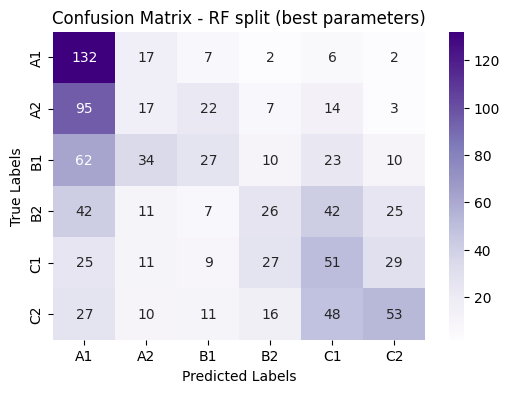

Scores for each class of the Random Forest Classifier with the best parameters for split train-test dataset:
                 A1        A2        B1        B2        C1        C2
Accuracy   0.795181  0.107595  0.162651  0.169935  0.335526  0.321212
Precision  0.344648  0.170000  0.325301  0.295455  0.277174  0.434426
Recall     0.795181  0.107595  0.162651  0.169935  0.335526  0.321212
F1 score   0.480874  0.131783  0.216867  0.215768  0.303571  0.369338


In [31]:
# Accuracy, Precision, Recall, F1-score with 'macro' average for simplicity (best parameters)

accuracy_RF_split_best = accuracy_score(y_test, RF_pred_best)
precision_RF_split_best = precision_score(y_test, RF_pred_best, average='macro')
recall_RF_split_best = recall_score(y_test, RF_pred_best, average='macro')
f1_RF_split_best = f1_score(y_test, RF_pred_best, average='macro')

RF_scores_best = pd.DataFrame([accuracy_RF_split_best, precision_RF_split_best, recall_RF_split_best, f1_RF_split_best], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['Average scores'])
print("Scores of the Random Forest Classifier with the best parameters for split train-test dataset:")
print(RF_scores_best) # Visualize all results in a dataframe

# Confusion Matrix (best parameters)

cm_RF_split_best = confusion_matrix(y_test, RF_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_RF_split_best, annot=True, fmt='d', cmap='Purples', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RF split (best parameters)')
plt.show()

# Accuracy, Precision, Recall, F1-score for each class (best parameters)

TP_RF_split_best = np.diag(cm_RF_split_best) # True positives for each class
tot_RF_split_best = cm_RF_split_best.sum(axis=1) # Total samples for each class

indiv_RF_accuracy_best = TP_RF_split_best / tot_RF_split_best # Accuracy for each class
indiv_RF_precision_best = precision_score(y_test, RF_pred_best, average = None)
indiv_RF_recall_best = recall_score(y_test, RF_pred_best, average = None)
indiv_RF_f1_best = f1_score(y_test, RF_pred_best, average = None)

indiv_RF_scores_best = pd.DataFrame([indiv_RF_accuracy_best, indiv_RF_precision_best, indiv_RF_recall_best, indiv_RF_f1_best], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
print("Scores for each class of the Random Forest Classifier with the best parameters for split train-test dataset:")
print(indiv_RF_scores_best) # Visualize all results in a dataframe

## Full dataset

In [32]:
# Initialize and fit the kNN classifier on the whole dataset
model_RF = RandomForestClassifier()

model_RF.fit(x_full_tfidf, y)

# Make predictions on the test data
RF_pred_full = model_RF.predict(x_test_unlabelled_tfidf)

df_pred_RF_full = pd.DataFrame({'id': x_test_unlabelled.index, 'difficulty': RF_pred_full})
df_pred_RF_full

,id,difficulty
0,0,C1
1,1,B1
2,2,A2
3,3,A1
4,4,C2
...,...,...
1195,1195,B1
1196,1196,A2
1197,1197,C2
1198,1198,A1


In [33]:
# Export the dataframe as csv
df_pred_RF_full.to_csv("submission_RF.csv", index=False)

# Export Model

In [34]:
import pickle

# Export 'model_LR'
with open('model_LR.pkl', 'wb') as file:
    pickle.dump((model_LR, vectorizer), file)